In [ ]:

""" 

This notebook is meant to:
 1. load the NASA Asteroid dataset,
 
 2. do some data cleaning and preparation,
 
 3. build a machine learning model, 
 
 4. use the model to solve a binary classification problem,
    namely, to classify whether asteriods are hazardeous or not.
    
"""

### 0. Import necessary libraries

In [1]:
import pandas as pd              # to handle data frames
import numpy as np               # to manipulate the data and perform any mathematical operations needed
import matplotlib.pyplot as plt  # to build visuals
import seaborn as sns            # to help plotting heatmaps

### 1. Load the dataset

In [2]:
# path_to_data = 'path/to/your/dataset'
path_to_data = "C:/Users/Hussein/Desktop/nasa.csv"

data = pd.read_csv(path_to_data)

In [3]:
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
data.shape

(4687, 40)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

### 2. Clean and prepare the dataset:

#### 2.1 Drop unnecessary columns/features that aren't going to contribute to the learning process

In [6]:
data = data.drop(['Neo Reference ID',
                  'Name',
                  'Orbit ID', 
                  'Close Approach Date',
                  'Epoch Date Close Approach',
                  'Orbit Determination Date', 
                  'Orbiting Body',
                  'Equinox'], axis= 1)

# print shape to confirm the success of column dropping
data.shape

(4687, 32)

#### 2.2 Prepare the features: one-hot encoding of the labels

In [7]:
hazardous_labels = pd.get_dummies(data['Hazardous'], dtype=int) 
# dtype=int to enforce get_dummies to return integers not boolean 
hazardous_labels

,False,True
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
4682,1,0
4683,1,0
4684,1,0
4685,1,0


In [8]:
data = pd.concat([data, hazardous_labels], axis = 1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True,0,1


In [9]:
data = data.drop(['Hazardous'], axis = 1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1


#### Plot a correlation heatmap to see the relationship between columns in the dataset

<Axes: >

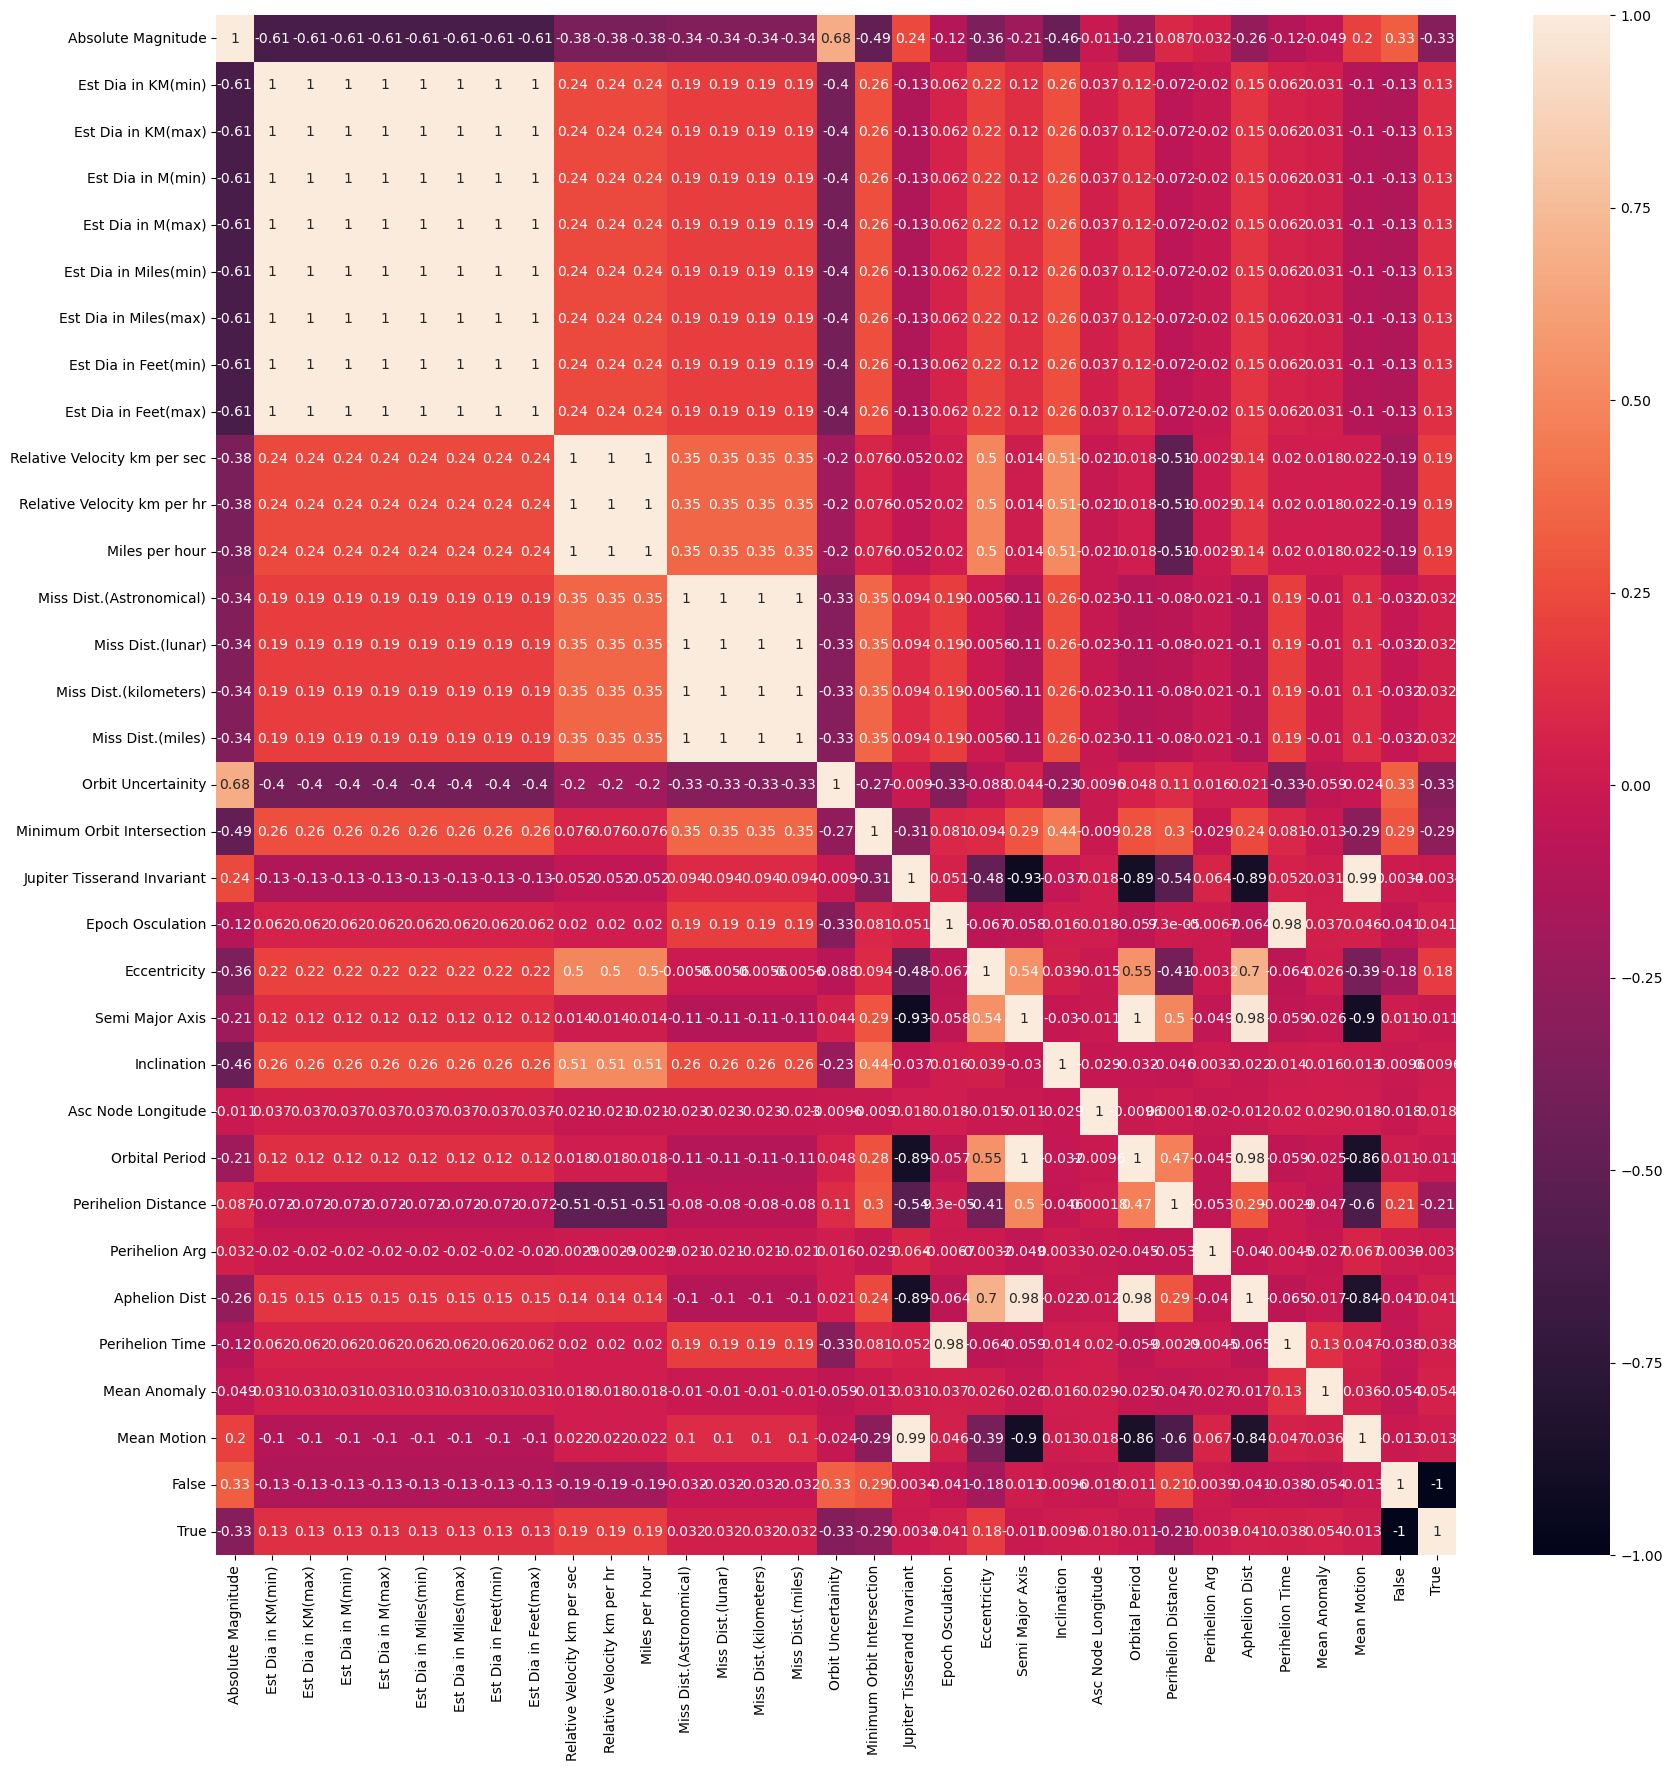

In [10]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

#### Some columns scored a correlation of 1. That means they are higly similar and therefore can be dropped

In [11]:
data = data.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)', False], axis = 1)
data.shape

(4687, 20)

In [12]:
data.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


## 3. Build A Model

In [13]:
### Split the label column from the other columns for features
features = data.drop([True], axis = 1)
labels = data[True].astype(int)

In [14]:
### split the dataset into two partitions: train 70% and test 30%
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,
                                                                            random_state = 0 , test_size = 0.3)

In [15]:
### make an instance from the XGBClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

xbg_classifier = XGBClassifier()


In [ ]:
""" 
The XGBoost classifier (XGBClassifier) is a powerful and efficient machine learning model based on the gradient boosting 
framework. It is widely used for classification tasks due to its ability to handle large datasets, and provide high accuracy.
"""

## 4.1 Training

In [16]:
xbg_classifier.fit(features_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

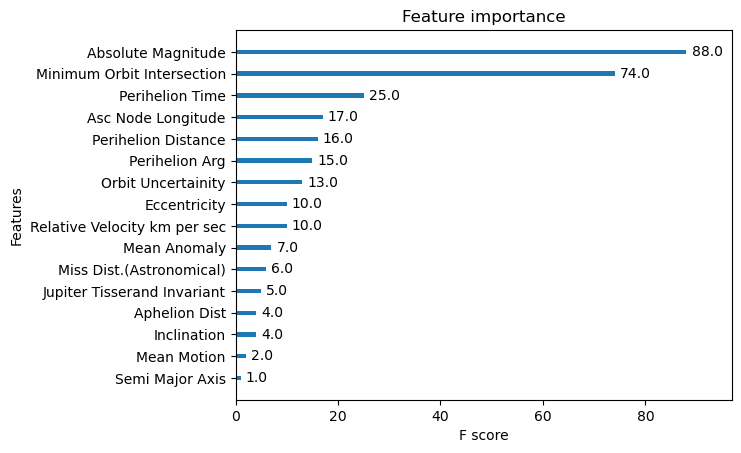

In [17]:
plot_importance(xbg_classifier, grid=False)
pyplot.show()

### 4.2 Test and report accuracy

In [18]:
from sklearn.metrics import accuracy_score

predictions = xbg_classifier.predict(features_test)
acc = accuracy_score(labels_test, predictions)
print(str(np.round(acc*100, 2))+'%')

99.64%
